# Adversarial Search: Playing Connect 4

Student Name: Max Link 

I have used the following AI tools: ChatGPT 

I understand that my submission needs to be my own work: ML 

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

## Definitions: 

**Initial State:** The initial state is an empty board, with no discs in play. This means that all seven columns are empty. 

**Actions:** The player can drop a disc (red or yellow depending on their side) into one of seven columns. 

**Transition model:** Once a player drops a disc in a row, the board changes to accomodate that disc. This means that the transition model is a changing of column state from empty to filled. Blocking the other player can be considered here. 

**Goal State:** Once one side (either red or yellow) create a horizontal, vertical, or diagonal line of four discs, the game is over. 

**How big is the state space? Give an estimate and explain it.**

The state space is seven columns by six rows of available options. The columns can be represented by c and the rows can be represented by r. This means that the state space is c x r big. We know that every board spot can be either: 

1. empty 
2. filled with red's piece 
3. filled with yellow's piece 

This gives us: c x r = 7 x 6 = 42 and each of the 3 states can take on one of these 42 possibilities. 

So the state space size is roughly 3^42.  

**How big is the game tree that minimax search will go through? Give an estimate and explain it.**

The game tree represents all possible sequences of moves starting from the initial board state to all possible game endings. This tree houses the different board configurations (states) and also houses the different paths to get to these states (seq. of moves), so the size of this tree can be significantly larger than the state space size. 

Terminology: Branching factor is the average number of moves available from any given board state. Varies depending on the amount of empty columns. At the start there are 7 possible  moves because there are 7 possible columns, but the branching factor decreases as the columns are filled up. Depth of the tree is the average number of moves in a typical game. Connect 4 games rarely use all 42 spots because games usually end when one player gets four in a row. Common averages are 20-30 moves before ending. Lets assume depth is 20 for our problem. 

The game tree that minimax search will go through is roughly 4^20. To get this number, we raised the average branching factor to the power of the depth. This assumes that the average branching factor over the course of the game is about 4, as the game progresses and fewer columns are available to play. This also assumes that the average game length (depth of the tree) is about 20 moves. 

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [496]:
# import numpy for array manipulation 
import numpy as np

# this function creates an empty board 
# the empty board has a shape parameter, which is x, y 
# x here is 6, representing the 6 columns 
# y here is 7, representing the 7 columns 
def empty_board(shape=(6, 7)):
    # np.full creates a multidimensional array 
    # this multidimensional array is 6x7, meaning it has 6 row and 7 columns 
    # every value in each row is filled with a zero with the fill_value=0 parameter 
    return np.full(shape=shape, fill_value=0)

# display the empty board with a print statement below 
print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

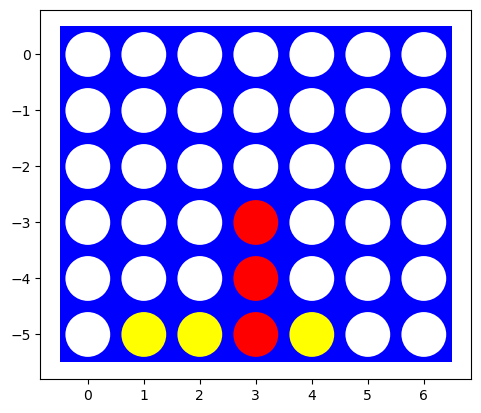

In [497]:
# Visualization code by Randolph Rankin
# -1 is yellow 
# 1 is red 

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

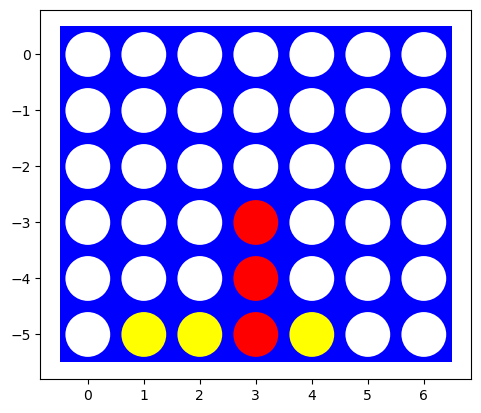

In [498]:
# custom visualization function for numpy arrays 

import matplotlib.pyplot as plt

def visualize_numpy(board):
    plt.axes()
    rectangle = plt.Rectangle((-0.5, len(board) * -1 + 0.5), len(board[0]), len(board), fc='blue')
    circles = []
    for i in range(board.shape[0]):  # using shape to iterate over numpy array
        for j in range(board.shape[1]):
            val = board[i, j]  # accessing the element directly as a scalar
            color = 'white' if val == 0 else 'red' if val == 1 else 'yellow' if val == -1 else 'black'  # Added black for unexpected values
            circles.append(plt.Circle((j, i * -1), 0.4, fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

# example usage with a numpy array
board = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, -1, -1, 1, -1, 0, 0]
])
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [499]:
# 4x4 board test 
# empty board 
board = [[0, 0, 0, 0], 
         [0, 0, 0, 0], 
         [0, 0, 0, 0], 
         [0, 0, 0, 0]]

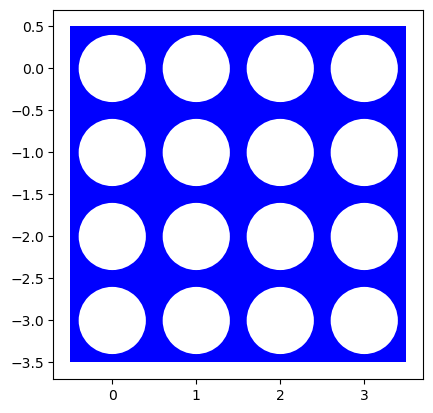

In [500]:
# visualize empty board 
visualize(board)

In [501]:
# filled 4x4 board 
filled_4 = [[0, 1, 0, -1], 
         [-1, 1, 0, 0], 
         [-1, 1, 0, 0], 
         [-1, 1, 0, 0]]

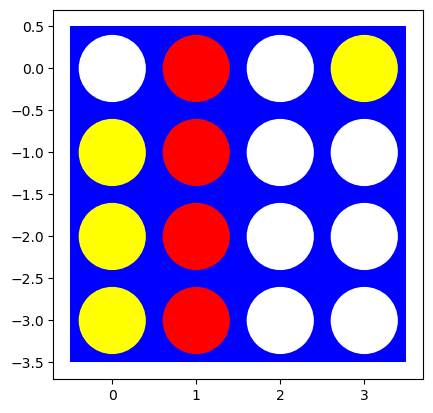

In [502]:
# visualize filled 4x4 
visualize(filled_4)

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [503]:
# for board array manipulation 
import numpy as np 

# import sys for sys.exit 
import sys

In [504]:
# function to check for win conditions - 4 in row, 4 in column, 4 in diagonal 

# function to check for columns: 
def col_checker(board): 
    # initialize state to 0 because the game by default is not won 
    state = 0 
    # the way the player won made global 
    move = ""
    # get the length of the board
    # for 4x4 should be 4 becauase len takes the vertical length 
    n = len(board)
    # empty list for holding found column   
    column = [] 
    # generate comparison array of 1's 
    # dynamic array allocation with n 
    # win state changes based on player 
    # n is the amount of columns, filling each column with only a single 1 to make a 1 row 
    # np.ones makes a matrix by default so index at 0 to just get one array for our comparison  
    win_state1 = np.ones((1, n), dtype = int) 
    #print("W1: \n", win_state1[0]) 
    # negative win state
    # np.full makes a matrix by default so we must index at 0 to just get one array for our comparison 
    win_state2 = np.full((1, n), -1) 
    #print("W2:\n", win_state2[0])  
    # check every row of the board 
    # 0-3 range for row
    for col in range(len(board)):
        # print("test_set column: \n", board[col][0])
        # holds the entire column in a column string 
        # builds up as loop is iterated 
        column += [board[col][0]]
        # print("col win state: ", win_state1) 
        # print(board[col][0])
    # print found column for testing 
    # print("col array: ", column) 
    # use np.array_equal to compare arrays
    if(np.array_equal(column, win_state1[0]) or np.array_equal(column, win_state2[0])): 
            # print("entered if!") 
            state = 1  
            # the way the player won 
            move = "four down"
    return state, move  

In [505]:
# function to check for rows: 
def row_checker(board):

    # real logic 
    # initialize state to 0 because the game by default is not won 
    state = 0 
    # get the length of the board
    # for 4x4 should be 4 becauase len takes the vertical length 
    n = len(board)
    # the way the player won made global 
    move = ""
    
    # get the shape of board 
    # r is the length of the rows on the board 
    r = board.shape[1]
    # print('r:', r) 
    # generate comparison array of 1's 
    # r is for dynamic array of 1 allocation based on board size 
    # r is the amount of columns, filling them with 1's
    # np.ones defaults to making a matrix, so to get a single array we will have to index 0 
    win_state1 = np.ones((1, r), dtype = int)
    # negative win state 
    # np.full for general fill 
    # np.full defaults to making a matrix, so to get a single array we will have to index 0 
    win_state2 = np.full((1, r), -1) 
    # print("win_state:", win_state) 
    # check every row of the board 
    # 0-3 range for row 
    for row in range(n): 
        # print("this is the row being compared: \n", board[row])
        # print("win state:\n ", win_state1[0])
        # if the game is won, set state to 1 
        # compare using np.array_equal to compare each element of the arrays to each other 
        # if they are equal enter the if statement 
        # this may not be okay to compare arrays directly. 
        # if state is not one 
        if(np.array_equal(board[row], win_state1[0]) or np.array_equal(board[row], win_state2[0]) and state != 1):
            # print("state updated!") 
            state = 1 
            # the way the player won 
            move = "four across"
            # print("State: ", state) 

    return state, move 


In [506]:
# check diagonal 

# diagonal check 
def diagonal_check(board, player): 
    # print("checking diagonals") 
    n = len(board) 
    # general diagonal_count to know when nxn diagonal has been found 
    # starts at 0 because no diagonal has been found 
    diagonal_count = 0 
    # the way the player won made global 
    move = ""

    for row in range(n): # row is 0 - 3 if 4x4 board  
        # print("ROW IS: ", row)
        # holds an entire row I.E [1, 0, 0, 0] 
        entire_row = board[row]
        # print("entire row: ", entire_row) 
        # check if the row contains 1 or -1 
        if 1 or -1 in entire_row:

            # records the index of the entire row 
            row_index = row 
            # records the value at a row
            # row gives an entire row, so 0 index it to get one value
            # this is so that you have the one value dynamically according to each array you pass in 
            # the one could be negative or positive and this will dynamically grab the type of 1 needed 
            # grabbing the first element only... this is wrong because there can be 1's in all sorts of places, not just the first index 
            # to make generalizable, I need to check the contents of the whole row --- use anther loop that is col
            # this loop is 0-3 for a 4x4 array and iterates across a row 
            for col in range(n): 
                # row gives the entire row 
                # col iteratres across the row 
                row_value = board[row][col]
                if row_value == 1 or -1: 
                    # exit the for
                    # print("found the first 1 at index: ", row_index, " exiting loop")
                    break 

        # print("row: \n", row_value) 
        
        # in the next rows, look one ahead and one behind the found row_index value 
        # print("looking one ahead of ", row_value, "at index: ", row_index)
        # print("and looking one behind of ", row_value, "at index: ", row_index) 

        # range is 1 to n to look at the rows that follow the first row. Do not consider row 0. 
        for row in range(1, n): 
            
            # holds an entire row I.E [1, 0, 0, 0] 
            entire_row = board[row]
     
            # grab only the indexes that are one behind row_index and one after row_index 
            # the value must be 1 or -1 to even be considered so check that condition first 
            # this checks if there is simply a 1 or -1 in the entire row 
            if 1 or -1 in entire_row: 
                # now grab the index of the 1 or -1
                # grabs the index that proceeds row_index. This index must be 1 space behind or 1 space after row_index to be considered valid 
                row_index_proc = row 
                # records the value at a row
                # row gives an entire row, so 0 index it to get one value
                # this is so that you have the one value dynamically according to each array you pass in 
                # the one could be negative or positive and this will dynamically grab the type of 1 needed 
                # grabbing the first element only... this is wrong because there can be 1's in all sorts of places, not just the first index 
                # to make generalizable, I need to check the contents of the whole row --- use anther loop that is col
                # this loop is 0-3 for a 4x4 array and iterates across a row
                # print("N IS: ", n) 
                for col in range(n): 
                    # row gives the entire row 
                    # col iteratres across the row 
                    row_value_proc = board[row][col]
                    if row_value == 1 or -1: 
                        # exit the for
                        # print("found the next 1 at a proceeding index: ", row_index_proc)
                        # looking one ahead and one behind 
                        if row_index + 1 == row_index_proc or row_index - 1 == row_index_proc: 
                            # print("There is a diagonal!") 
                            # have some count variable to look for n board win condition (generalizable with n) 
                            # increment diagonal_count because a diagonal has been found 
                            diagonal_count += 1
                            # return if diagonal_count == n because n is the length of the board 
                            # the length of the board also works as a win parameter, because if you have a 4x4, then 4 is the amount of discs the player needs to get in a diagonal 
                            if(diagonal_count == n): 
                                state = 1
                                # the way the player won stored in move 
                                move = "diagonal"
                                # print("state is: ", state, " returning!")  
                                return state, move 
                            # break out of the for loop 
                           # break 
                        # unecessary? 
                        # break 
    # no diagonals found
    state = 0 
    return state 


In [507]:
# state_check function for main state check flow 

def state_check(board, player): 
    # starting values for terminal condition 
    # start as 0 because no one has won the game yet 
    # 1 when game won 
    state_row = 0 
    state_col = 0 
    state_diag = 0 
    # the state the players win by 
    state = " "
    # print("State:" , state) 
    # check if the game is won 
    # analyze all rows for four 1 or -1 
    # analyze all columns for four 1 or -1 
    # how do we do diagonals? start on a row and move in until you find 1 or -1
    # finding 1 or -1 determines which should be checked, then go to the next row 
    # on the next row, go one further than you went on the first row.... repeat until 4 hit
    # check rows - works  
    state_row, state = row_checker(board) 
    # check columns 
    state_col, state = col_checker(board)
    # check diagonal 
    # state_diag, state = diagonal_check(board, player) 

    if(state_row == 1 or state_col == 1 or state_diag == 1): 
        print("player: ", player, " won via ", state, "! Ending game.")
        # exit the program because the game has been won 
        return 0 
        # sys.exit()
        # print("pretend sys.exit(). Reenable sys.exit() after testing!") 
    else: 
        print("win state not reached") 


In [508]:
# in a traditional game of connect 4, red goes first 
# player has default value 1, signifying red 
# yellow is -1 value for player
# player set to 1 by default so that red can go first 
# pass a running row variable to simulate gravity 
def random_player(board, player = 1): 
    # print("randomly playing!")
    
    # make a copy of board 
    new_board = board.copy() 

    # code 
    if player == 1: 
        # print("Red's turn")
        # get the board length 
        n = len(new_board) 
        # print("N:", n) 
        # change the board
        # rannge n: 0 - 3 because n = 4
        col = np.random.randint(0, n) 
        # increment row to simulate gravity
        # TODO - count number of 1's in col of board state to assign the row we want to choose 
        # row += 1 
        # row = np.random.randint(0, n) 
        # change one element of board to new move 
        # new_board[col][0] = 1  
        new_board[row][col] = 1      
    else: 
        # print("Yellow's turn")
        # get the board length 
        n = len(new_board) 
        # print("N:", n) 
        # change the board
        # rannge n: 0 - 3 because n = 4
        col = np.random.randint(0, n) 
        # increment row to simulate gravity 
        # TODO - count number of 1's in col of board state to assign the row we want to choose 
        # row += 1 
        # row = np.random.randint(0, n) 
        # change one element of board to new move 
        # new_board[col][3] = -1        
        new_board[row][col] = -1
    # return the randomly updated board & the player 
    return new_board, player 

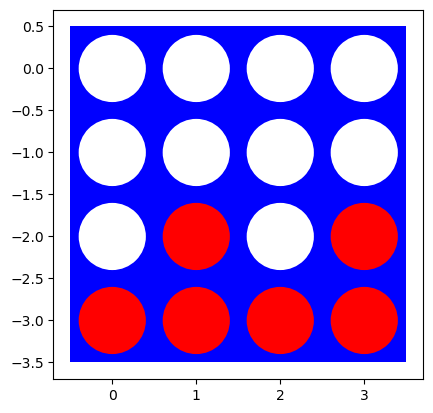

initiaitng count for the entire  1  column
a 1 has been found in col  1
row is:  2
Amount of 1's found:  1


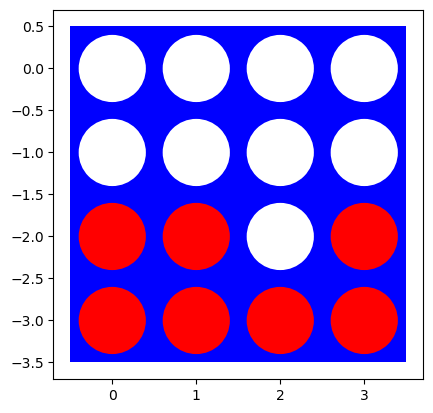

In [604]:
# board test -- different ways to ping the board

# print(board)
col = 0 
# set to 3 to start from bottom & subtract to go up a column 
row = 3 

# row must change to iterate through an entire column and count the 1's in that column 
board[row][col]

# get the length of the board 
# the length is 4 so now we can go through the entire column by iterating 
length = len(board)
    

# now try to count another board with a specific amount of 1's to check counting logic 
# want to count the whole second column in this example; 3 ones 
# this means that col needs to be 1 
board = [[0, 0, 0, 0], 
         [0, 0, 0, 0], 
         [0, 1, 0, 1], 
         [1, 1, 1, 1]]

visualize(board)

# var to hold 1's 
one_count = 0 

# define column to search through here 
column_selected = np.random.randint(0, length)

# add one to column_selected to have the first column identify as 1, second as 2, 3rd as 3 etc. 
print("initiaitng count for the entire ", column_selected + 1, " column")
for r in range(length): 
    # print("row is: ", row)
    # test with random column instead of fixing at 1 
    # col = 1 
    # col can range from 0 - 3 
    col = column_selected
    # count conditional 
    if board[row][col] == 1: 
        print("a 1 has been found in col ", col + 1)
        one_count += 1 
    # else, found a zero
    # if you have found a zero then just place a 1 or -1 
    else: 
        # row -= 1
        print("row is: ", row)
        # updating board with 1 
        board[row][col] = 1 
        # as soon as place, then exit 
        break
    row -= 1 

print("Amount of 1's found: ", one_count)

# show the updated board 
visualize(board)



In [509]:
# make a board to pass to random player 
# 4x4 board is the smallest board, for testing purposes 
# starts empty 
# board = [[0, 0, 0, 0], 
#          [0, 0, 0, 0], 
#          [0, 0, 0, 0], 
#          [0, 0, 0, 0]]

# 4 rows & 4 columns 
# initialized as np array so that the .shape check and other mechanics will work in the state_check() function 
board = np.zeros((4, 4), dtype = int)  

# print(board)

# visualize_numpy(board)


In [527]:
# basic game flow 

# for testing to break while loop 
count = 0 

# while loop - game logic 
while True:
    # red goes first 
    # player is red by default in random_player, so do not pass anything in for player 
    board, player = random_player(board)
    
    print(board)
    
    # check state - state_check will end the game if a disc is in four adjacent spots 
    # pass in the player for this check to know if you need to check for 1 or -1 
    state_check(board, player)

    # yellow goes second 
    yellow = -1 
    board, player = random_player(board, yellow)
    
    print(board)

    # check state - state_check will end the game if a disc is in four adjacent spots 
    # pass player for this check like above 
    state_check(board, player) 
    
    # for testing break 
    if(count == 4): 
        break; 
    
    # increment count 
    count+=1
    
    
print("new board", board)

[[ 1  0  0  0]
 [ 1  0  0 -1]
 [ 1  0  0 -1]
 [ 1  0  0 -1]]
player:  1  won via  four down ! Ending game.
[[ 1  0  0  0]
 [ 1  0  0 -1]
 [ 1  0  0 -1]
 [ 1  0  0 -1]]
player:  -1  won via  four down ! Ending game.
[[ 1  0  0  0]
 [ 1  0  0 -1]
 [ 1  0  0 -1]
 [ 1  0  0 -1]]
player:  1  won via  four down ! Ending game.
[[ 1  0  0  0]
 [ 1  0  0 -1]
 [ 1  0  0 -1]
 [ 1  0  0 -1]]
player:  -1  won via  four down ! Ending game.
[[ 1  0  0  0]
 [ 1  0  0 -1]
 [ 1  0  0 -1]
 [ 1  0  0 -1]]
player:  1  won via  four down ! Ending game.
[[ 1  0  0  0]
 [ 1  0  0 -1]
 [ 1  0  0 -1]
 [ 1  0  0 -1]]
player:  -1  won via  four down ! Ending game.
[[ 1  0  0  0]
 [ 1  0  0 -1]
 [ 1  0  0 -1]
 [ 1  0  0 -1]]
player:  1  won via  four down ! Ending game.
[[ 1  0  0 -1]
 [ 1  0  0 -1]
 [ 1  0  0 -1]
 [ 1  0  0 -1]]
player:  -1  won via  four down ! Ending game.
[[ 1  0  0 -1]
 [ 1  0  0 -1]
 [ 1  0  0 -1]
 [ 1  0  0 -1]]
player:  1  won via  four down ! Ending game.
[[ 1  0  0 -1]
 [ 1  0  0 -1]
 [ 

In [511]:
# print("new board end state: \n", board)


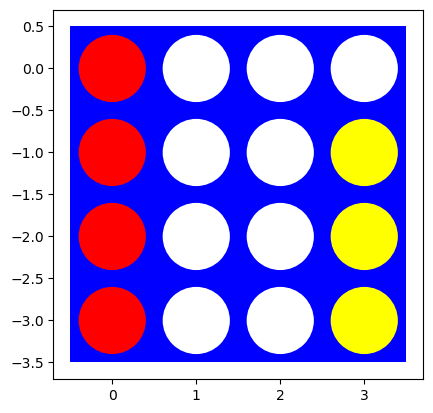

In [512]:
# TODO - Add in gravity.... drop should be systematic not random 
# TODO - the checks do not work and we are just looping through until a certain count.... should run until win state (1 of the 3)
# TODO - fix diagonal behavior to work correctly, right now it hits the win condition without a full diagonal being met. It could be counting non diagonal plays? 
# TODO - fix row and column behavior to only hit a win condition when the entire column is filled with either -1 (yellow) or 1 (red), not both 
visualize_numpy(board)

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [513]:
# Your code/ answer goes here.

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [514]:
# Your code/ answer goes here.

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [515]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [516]:
# Your code/ answer goes here.

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [517]:
# Your code/ answer goes here.

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [518]:
# Your code/ answer goes here.

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [519]:
# Your code/ answer goes here.

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

In [520]:
# Your code/ answer goes here.

### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [521]:
# Your code/ answer goes here.

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [522]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [523]:
# Your code/ answer goes here.

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [524]:
# Your code/ answer goes here.

## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [525]:
# Your code/ answer goes here.

### Best First Move

Use Oure Monte Carlo Search to determine what the best first move is? Describe under what assumptions this is the "best" first move.  

In [526]:
# Your code/ answer goes here.